In [1]:
# Step 1: Load the data from Excel and display the first few rows for confirmation

import pandas as pd

# Load Excel file
file_path =r"C:\Users\UTKARSH ANAND\Downloads\MultiAssetPrices_2020-20256.xlsx"
data = pd.read_excel(file_path, index_col=0, parse_dates=True)

# Show first 5 rows for user confirmation
data.head()


,EURUSD=X,GBPUSD=X,GBPJPY=X,USDINR=X,USDJPY=X,GC=F,SI=F,^GSPC,^NSEI,^FTSE,^TNX,^VIX
Date,,,,,,,,,,,,
2020-01-02,1.122083,1.325030,144.048004,71.025002,108.712997,1524.500000,17.966000,3257.850098,12282.200195,7604.299805,1.882,12.47
2020-01-03,1.117144,1.315270,142.707993,71.415001,108.542999,1549.199951,18.068001,3234.850098,12226.650391,7622.399902,1.788,14.02
2020-01-06,1.116196,1.308010,141.201004,71.731003,107.963997,1566.199951,18.097000,3246.280029,11993.049805,7575.299805,1.811,13.85
2020-01-07,1.119799,1.317003,142.772995,71.787003,108.405998,1571.800049,18.316000,3237.179932,12052.950195,7573.899902,1.827,13.79
2020-01-08,1.115474,1.311372,141.639008,72.160004,108.015999,1557.400024,18.087999,3253.050049,12025.349609,7574.899902,1.874,13.45


In [2]:
import numpy as np

# Step 2: Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Show first few rows of log returns
log_returns.head()


,EURUSD=X,GBPUSD=X,GBPJPY=X,USDINR=X,USDJPY=X,GC=F,SI=F,^GSPC,^NSEI,^FTSE,^TNX,^VIX
Date,,,,,,,,,,,,
2020-01-03,-0.004411,-0.007393,-0.009346,0.005476,-0.001565,0.016072,0.005661,-0.007085,-0.004533,0.002377,-0.051237,0.117159
2020-01-06,-0.000849,-0.005535,-0.010616,0.004415,-0.005349,0.010914,0.001604,0.003527,-0.019291,-0.006198,0.012782,-0.012200
2020-01-07,0.003223,0.006851,0.011071,0.000780,0.004086,0.003569,0.012029,-0.002807,0.004982,-0.000185,0.008796,-0.004342
2020-01-08,-0.003870,-0.004284,-0.007974,0.005182,-0.003604,-0.009204,-0.012526,0.004890,-0.002293,0.000132,0.025400,-0.024965
2020-01-09,-0.003730,-0.000655,0.008689,-0.010421,0.009353,-0.003667,-0.012685,0.006633,0.015722,0.003058,-0.008574,-0.070056


In [10]:
# Save to CSV
log_returns.to_csv("log_returns_cleaned.csv")
print("✅ log_returns_cleaned.csv saved successfully.")

✅ log_returns_cleaned.csv saved successfully.


In [3]:
# Step 3: Feature Engineering - SMA and Volatility

# Initialize a copy of returns to build features
features = log_returns.copy()

# Add 10-day Simple Moving Average (SMA) for each asset
sma_10 = data.rolling(window=10).mean().iloc[-len(features):]
for col in data.columns:
    features[f'{col}_SMA_10'] = sma_10[col]

# Add 10-day rolling volatility (standard deviation) of log returns
volatility_10 = log_returns.rolling(window=10).std()
for col in log_returns.columns:
    features[f'{col}_Vol_10'] = volatility_10[col]

# Drop any rows with NaNs after rolling operations
features.dropna(inplace=True)

# Show a preview of engineered features
features.iloc[:, -12:].head()  # Show last 12 columns (new features)


,EURUSD=X_Vol_10,GBPUSD=X_Vol_10,GBPJPY=X_Vol_10,USDINR=X_Vol_10,USDJPY=X_Vol_10,GC=F_Vol_10,SI=F_Vol_10,^GSPC_Vol_10,^NSEI_Vol_10,^FTSE_Vol_10,^TNX_Vol_10,^VIX_Vol_10
Date,,,,,,,,,,,,
2020-01-16,0.002658,0.004280,0.007215,0.004965,0.004381,0.007955,0.010678,0.005142,0.008963,0.003279,0.022576,0.047009
2020-01-17,0.002323,0.003952,0.006698,0.004711,0.004301,0.006434,0.010827,0.004102,0.008791,0.004195,0.015874,0.021940
2020-01-21,0.002581,0.003963,0.005865,0.004427,0.003639,0.005331,0.011694,0.004446,0.007703,0.004623,0.019725,0.032331
2020-01-22,0.002207,0.003327,0.004795,0.004494,0.003806,0.005124,0.010715,0.004151,0.007856,0.004951,0.019365,0.032553
2020-01-23,0.002035,0.003999,0.004027,0.003961,0.003563,0.004668,0.010203,0.004088,0.007975,0.005629,0.016855,0.032062


In [4]:
# Step 4: Train-test split for supervised learning

# Target variable is next-day log returns
target = log_returns.shift(-1)

# Align feature and target dimensions
X = features.iloc[:-1]
y = target.iloc[:-1]
X_test = features.iloc[-1:].copy()
y_test = target.iloc[-1:].copy()

# Show shapes and preview
{
    "Training features shape": X.shape,
    "Training target shape": y.shape,
    "Test feature (last row)": X_test,
    "Test target (next-day returns)": y_test
}


{'Training features shape': (1219, 36),
 'Training target shape': (1228, 12),
 'Test feature (last row)':             EURUSD=X  GBPUSD=X  GBPJPY=X  USDINR=X  USDJPY=X      GC=F  \
 Date                                                                     
 2025-03-28  0.005472   0.00576  0.008208 -0.004663  0.002482  0.008558   
 
                 SI=F     ^GSPC     ^NSEI     ^FTSE  ...  GBPJPY=X_Vol_10  \
 Date                                                ...                    
 2025-03-28 -0.007276 -0.019935 -0.003082 -0.000831  ...         0.005364   
 
             USDINR=X_Vol_10  USDJPY=X_Vol_10  GC=F_Vol_10  SI=F_Vol_10  \
 Date                                                                     
 2025-03-28         0.003488         0.004705      0.00632      0.01457   
 
             ^GSPC_Vol_10  ^NSEI_Vol_10  ^FTSE_Vol_10  ^TNX_Vol_10  ^VIX_Vol_10  
 Date                                                                            
 2025-03-28      0.014219      0.007156     

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# === Step 5: Target Alignment ===
# Shift log returns to create the prediction target
target_aligned = log_returns.shift(-1)

# Align target to features
y = target_aligned.loc[X.index]

# === Step 5A: Split into training (till Feb 28, 2024) and 1-year test (from Feb 29, 2024) ===
X_train = X.iloc[:-252]
y_train = y.iloc[:-252]
X_last_year = X.tail(252)
y_last_year = y.tail(252)

# === Step 5B: Train Random Forest ===
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# === Step 5C: Predict on last 1 year ===
rf_pred_last_year = rf_model.predict(X_last_year)

# === Step 5D: Evaluate performance ===
rf_rmse = root_mean_squared_error(y_last_year, rf_pred_last_year)
rf_mae = mean_absolute_error(y_last_year, rf_pred_last_year)
rf_r2 = r2_score(y_last_year, rf_pred_last_year)

# === Step 5E: Output ===
print("📈 Random Forest Predictions for 1-Year Test Set:")
print(rf_pred_last_year)

print("\n📊 Evaluation Metrics (1-Year):")
print(f"RMSE: {rf_rmse:.6f}")
print(f"MAE: {rf_mae:.6f}")
print(f"R² Score: {rf_r2:.4f}")


📈 Random Forest Predictions for 1-Year Test Set:
[[-1.35301479e-05  5.58013900e-05  3.44255140e-04 ...  6.11854177e-04
   1.57554293e-03 -2.46308739e-03]
 [ 2.01137518e-04  2.69134854e-04  5.24243090e-04 ...  5.50319301e-04
   1.66209390e-03 -2.73147098e-03]
 [ 9.65392448e-05  1.72417724e-04  5.12351130e-04 ...  3.84826290e-04
   1.25635676e-03 -1.53858905e-03]
 ...
 [ 1.06431800e-04  1.93498821e-04  5.96101482e-04 ...  5.00528026e-04
   1.24991957e-03 -3.34156341e-03]
 [ 6.48520385e-06  3.01862525e-05  4.49071694e-04 ...  3.12947488e-04
   9.49316054e-04 -2.82871241e-03]
 [ 5.77680005e-05  1.15024811e-04  4.98286335e-04 ...  3.94992830e-04
   1.18826358e-03 -3.63359356e-03]]

📊 Evaluation Metrics (1-Year):
RMSE: 0.015273
MAE: 0.010909
R² Score: -0.0153


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Initialize results dictionary
xgb_results = {}
xgb_predictions = {}

# Train XGBoost separately for each asset column
for asset in y_train.columns:
    print(f"⏳ Training XGBoost for: {asset}")
    
    model = XGBRegressor(
        n_estimators=100,        # 100 boosting rounds
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        verbosity=0
    )
    
    # Train on the respective asset
    model.fit(X_train, y_train[asset])
    
    # Predict for the last 1 year
    pred = model.predict(X_last_year)
    xgb_predictions[asset] = pred

    # Evaluate with future-proof root_mean_squared_error
    rmse = root_mean_squared_error(y_last_year[asset], pred)
    mae = mean_absolute_error(y_last_year[asset], pred)
    r2 = r2_score(y_last_year[asset], pred)

    # Store results
    xgb_results[asset] = {
        'RMSE': round(rmse, 6),
        'MAE': round(mae, 6),
        'R2 Score': round(r2, 6)
    }

print("✅ All XGBoost models trained successfully.")


⏳ Training XGBoost for: EURUSD=X
⏳ Training XGBoost for: GBPUSD=X
⏳ Training XGBoost for: GBPJPY=X
⏳ Training XGBoost for: USDINR=X
⏳ Training XGBoost for: USDJPY=X
⏳ Training XGBoost for: GC=F
⏳ Training XGBoost for: SI=F
⏳ Training XGBoost for: ^GSPC
⏳ Training XGBoost for: ^NSEI
⏳ Training XGBoost for: ^FTSE
⏳ Training XGBoost for: ^TNX
⏳ Training XGBoost for: ^VIX
✅ All XGBoost models trained successfully.


In [8]:
!pip install tensorflow matplotlib scikit-learn



🔁 Training LSTM for: EURUSD=X
Epoch 1/20


C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0901
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0156
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0124
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0140
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0134
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0125
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0130
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0141
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0127
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0124
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0141
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0137
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0133
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0134
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0124
Epoch 16/20
29/

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


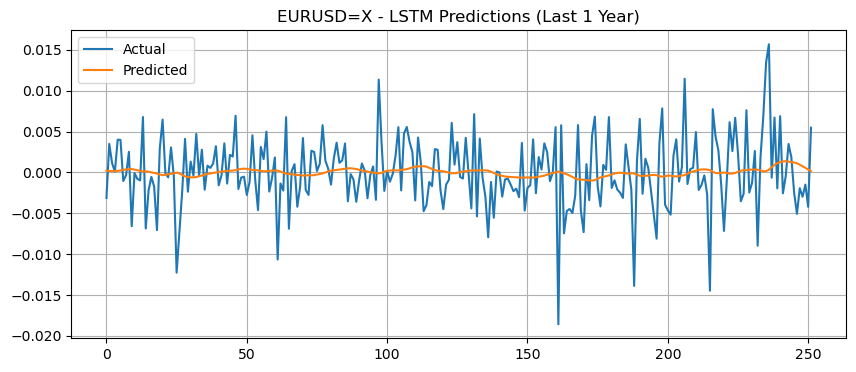


🔁 Training LSTM for: GC=F
Epoch 1/20


C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0694
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0114
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0108
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0098
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0102
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0097
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0112
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0106
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0107
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0110
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0102
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0099
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0091
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0106
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0107
Epoch 16/20
29/

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


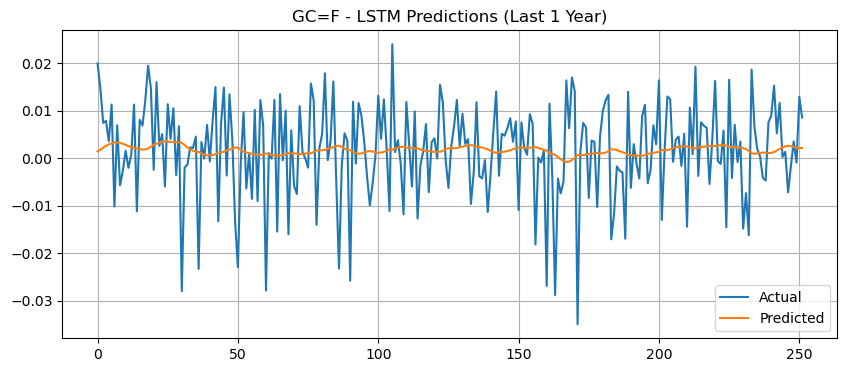

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔁 Training LSTM for: ^NSEI
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2006
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0088
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0064
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0068
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0058
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0061
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0060
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0048
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0058
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0059
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0048
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0046
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0050
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0049
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


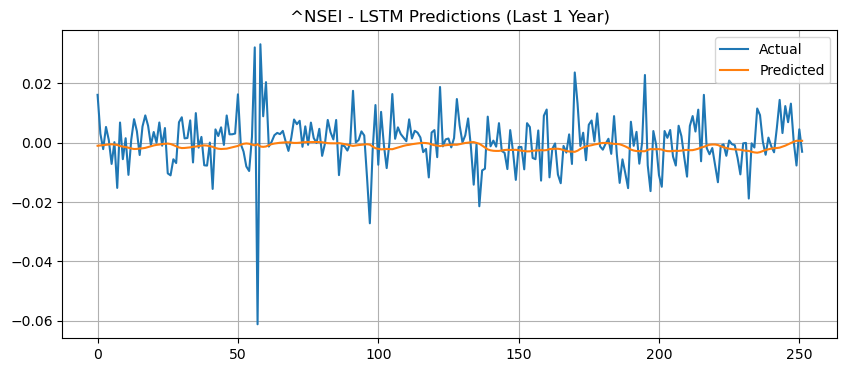

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔁 Training LSTM for: ^TNX
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0452
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0029
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0030
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0025
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0025
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0025
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0028
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0025
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0028
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


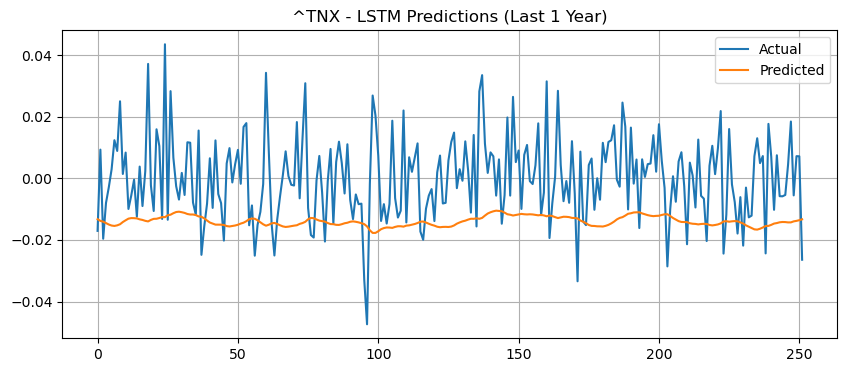

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔁 Training LSTM for: ^VIX
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0487
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0090
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0077
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0104
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0077
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0080
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0085
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0080
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0084
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0078
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0079
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0078
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0076
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0072
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39

C:\Users\UTKARSH ANAND\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


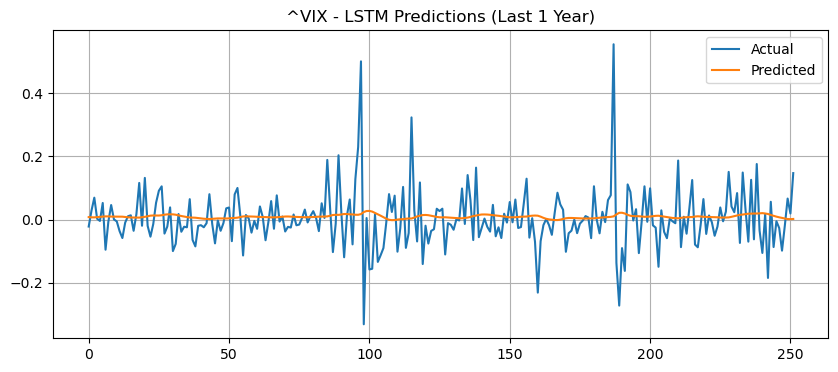


📊 LSTM Model Evaluation Summary (Last 1-Year):


,RMSE,MAE,R2
EURUSD=X,0.004383,0.003289,-0.011151
GC=F,0.010060,0.007704,-0.016928
^NSEI,0.009239,0.006414,-0.055831
^TNX,0.019527,0.015874,-1.058726
^VIX,0.092409,0.061825,-0.030646


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# ✅ Use the existing `log_returns` from previous steps
# Select one asset from each class
selected_assets = ['EURUSD=X', 'GC=F', '^NSEI', '^TNX', '^VIX']

# Function to create sequences
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Store evaluation results
lstm_results = {}

# Train LSTM for each selected asset
for asset in selected_assets:
    print(f"\n🔁 Training LSTM for: {asset}")
    asset_data = log_returns[asset].dropna().values.reshape(-1, 1)

    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(asset_data)

    # Create sequences
    X_all, y_all = create_sequences(scaled_data)
    X_train, X_test = X_all[:-252], X_all[-252:]
    y_train, y_test = y_all[:-252], y_all[-252:]

    # Reshape for LSTM input
    X_train = X_train.reshape(-1, 60, 1)
    X_test = X_test.reshape(-1, 60, 1)

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # Predict and inverse scale
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluation
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    lstm_results[asset] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    # Plot predictions vs actual
    plt.figure(figsize=(10, 4))
    plt.plot(y_actual, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(f"{asset} - LSTM Predictions (Last 1 Year)")
    plt.legend()
    plt.grid()
    plt.show()

# Display summary table
results_df = pd.DataFrame(lstm_results).T
print("\n📊 LSTM Model Evaluation Summary (Last 1-Year):")
display(results_df.round(6))


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load data
log_returns = pd.read_csv(r"C:\Users\UTKARSH ANAND\Downloads\Book1.xlsx", index_col=0, parse_dates=True)

# Asset list
selected_assets = ['EURUSD=X', 'GC=F', '^NSEI', '^TNX', '^VIX']

# Function to create technical indicators
def add_technical_indicators(data_series):
    df = pd.DataFrame(data_series, columns=["price"])
    df['rsi'] = RSIIndicator(df['price']).rsi()
    df['sma'] = SMAIndicator(df['price'], window=14).sma_indicator()
    macd = MACD(df['price'])
    df['macd'] = macd.macd_diff()
    return df.dropna()

# Function to create sequences
def create_sequences(data, lookback=90):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i][0])  # predict the original price (first column)
    return np.array(X), np.array(y)

# Final results
lstm_results = {}

# Loop through assets
for asset in selected_assets:
    print(f"🔁 Training BiLSTM for: {asset}")
    data = log_returns[asset].dropna()
    df = add_technical_indicators(data)

    if df.shape[0] < 365:
        print(f"⚠️ Not enough data for {asset}. Skipping...")
        continue

    # Scale
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Create sequences
    X_all, y_all = create_sequences(scaled_data, lookback=90)
    X_train, X_test = X_all[:-252], X_all[-252:]
    y_train, y_test = y_all[:-252], y_all[-252:]

    # Reshape
    X_train = X_train.reshape(-1, 90, scaled_data.shape[1])
    X_test = X_test.reshape(-1, 90, scaled_data.shape[1])

    # Build model
    model = Sequential([
        Input(shape=(90, scaled_data.shape[1])),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train
    model.fit(X_train, y_train, epochs=50, batch_size=32,
              validation_split=0.1, callbacks=[early_stop], verbose=1)

    # Predict
    y_pred_scaled = model.predict(X_test)
    y_test_reshaped = y_test.reshape(-1, 1)
    dummy_full = np.zeros((len(y_test), scaled_data.shape[1]))
    dummy_full[:, 0] = y_test
    dummy_full_pred = np.zeros((len(y_pred_scaled), scaled_data.shape[1]))
    dummy_full_pred[:, 0] = y_pred_scaled.reshape(-1)

    y_pred = scaler.inverse_transform(dummy_full_pred)[:, 0]
    y_actual = scaler.inverse_transform(dummy_full)[:, 0]

    # Evaluation
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    lstm_results[asset] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(y_actual, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(f"{asset} - BiLSTM Forecast")
    plt.legend()
    plt.grid()
    plt.show()

# Display summary
results_df = pd.DataFrame(lstm_results).T
import ace_tools as tools; tools.display_dataframe_to_user(name="BiLSTM Model Evaluation", dataframe=results_df.round(6))


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe4 in position 14: invalid continuation byte

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator
from ta.volatility import BollingerBands
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the new Excel file
file_path =r"C:\Users\UTKARSH ANAND\Downloads\Book1.xlsx"
log_returns = pd.read_excel(file_path, index_col=0, parse_dates=True)

# Selected assets
selected_assets = ['EURUSD=X', 'GC=F', '^NSEI', '^TNX', '^VIX']

# Function to create technical indicators and lag features
def add_features(data_series):
    df = pd.DataFrame(data_series, columns=["price"])
    df['rsi'] = RSIIndicator(df['price']).rsi()
    df['sma'] = SMAIndicator(df['price'], window=14).sma_indicator()
    macd = MACD(df['price'])
    df['macd'] = macd.macd_diff()
    bb = BollingerBands(df['price'])
    df['bb_width'] = bb.bollinger_wband()

    # Lag features
    df['lag1'] = df['price'].shift(1)
    df['lag2'] = df['price'].shift(2)
    df['lag3'] = df['price'].shift(3)

    # Volatility (rolling standard deviation)
    df['volatility'] = df['price'].rolling(window=14).std()

    return df.dropna()

# Function to create sequences
def create_sequences(data, lookback=90):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i][0])  # target is original price
    return np.array(X), np.array(y)

# Prepare structure to store results
improved_results = {}

# Loop for each asset
for asset in selected_assets:
    data = log_returns[asset].dropna()
    df = add_features(data)

    if df.shape[0] < 365:
        continue

    # Scaling
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Sequence generation
    X_all, y_all = create_sequences(scaled_data, lookback=90)
    X_train, X_test = X_all[:-252], X_all[-252:]
    y_train, y_test = y_all[:-252], y_all[-252:]

    # Reshape input
    X_train = X_train.reshape(-1, 90, scaled_data.shape[1])
    X_test = X_test.reshape(-1, 90, scaled_data.shape[1])

    # Model architecture
    model = Sequential([
        Input(shape=(90, scaled_data.shape[1])),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=0)

    # Predict and inverse scale
    y_pred_scaled = model.predict(X_test)
    dummy_actual = np.zeros((len(y_test), scaled_data.shape[1]))
    dummy_actual[:, 0] = y_test
    dummy_pred = np.zeros((len(y_pred_scaled), scaled_data.shape[1]))
    dummy_pred[:, 0] = y_pred_scaled.reshape(-1)

    y_actual = scaler.inverse_transform(dummy_actual)[:, 0]
    y_pred = scaler.inverse_transform(dummy_pred)[:, 0]

    # Evaluation
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    improved_results[asset] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# Convert to DataFrame for output
improved_results_df = pd.DataFrame(improved_results).T.round(6)
print("\n📊 Improved BiLSTM Model Evaluation Summary (Last 1-Year):")
print(improved_results_df)



📊 Improved BiLSTM Model Evaluation Summary (Last 1-Year):
Empty DataFrame
Columns: []
Index: []


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load data
log_returns = pd.read_excel(r"C:\Users\UTKARSH ANAND\Downloads\Book1.xlsx", index_col=0, parse_dates=True)

# Asset list
selected_assets = ['EURUSD=X', 'GC=F', '^NSEI', '^TNX', '^VIX']

# Create technical indicators
def add_technical_indicators(data_series):
    df = pd.DataFrame(data_series, columns=["price"])
    df['rsi'] = RSIIndicator(df['price']).rsi().fillna(method="bfill")
    df['sma'] = SMAIndicator(df['price'], window=14).sma_indicator().fillna(method="bfill")
    df['macd'] = MACD(df['price']).macd_diff().fillna(method="bfill")
    return df

# Sequence builder
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i][0])  # target: original price column
    return np.array(X), np.array(y)

# Store results
improved_results = {}

# Loop through each asset
for asset in selected_assets:
    print(f"\n🔁 Training BiLSTM for: {asset}")
    try:
        data = log_returns[asset].dropna()
    except KeyError:
        print(f"⚠️ {asset} not found in dataset. Skipping.")
        continue

    df = add_technical_indicators(data)

    if df.shape[0] < 310:
        print(f"⚠️ Not enough data for {asset}. Skipping... Only {df.shape[0]} rows.")
        continue

    # Scaling
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Sequences
    X_all, y_all = create_sequences(scaled_data, lookback=60)
    X_train, X_test = X_all[:-252], X_all[-252:]
    y_train, y_test = y_all[:-252], y_all[-252:]

    # Reshape
    X_train = X_train.reshape(-1, 60, scaled_data.shape[1])
    X_test = X_test.reshape(-1, 60, scaled_data.shape[1])

    # Model architecture
    model = Sequential([
        Input(shape=(60, scaled_data.shape[1])),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=32,
              validation_split=0.1, callbacks=[early_stop], verbose=1)

    # Predict
    y_pred_scaled = model.predict(X_test)
    dummy_actual = np.zeros((len(y_test), scaled_data.shape[1]))
    dummy_pred = np.zeros((len(y_pred_scaled), scaled_data.shape[1]))
    dummy_actual[:, 0] = y_test
    dummy_pred[:, 0] = y_pred_scaled.flatten()

    y_actual = scaler.inverse_transform(dummy_actual)[:, 0]
    y_pred = scaler.inverse_transform(dummy_pred)[:, 0]

    # Metrics
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)

    # Store
    improved_results[asset] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(y_actual, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(f"{asset} - BiLSTM Forecast")
    plt.legend()
    plt.grid()
    plt.show()

# Results Summary
results_df = pd.DataFrame(improved_results).T.round(6)
print("\n📊 Improved BiLSTM Model Evaluation Summary (Last 1-Year):\n")
print(results_df)



🔁 Training BiLSTM for: EURUSD=X
⚠️ Not enough data for EURUSD=X. Skipping... Only 0 rows.

🔁 Training BiLSTM for: GC=F
⚠️ Not enough data for GC=F. Skipping... Only 0 rows.

🔁 Training BiLSTM for: ^NSEI
⚠️ Not enough data for ^NSEI. Skipping... Only 0 rows.

🔁 Training BiLSTM for: ^TNX
⚠️ Not enough data for ^TNX. Skipping... Only 0 rows.

🔁 Training BiLSTM for: ^VIX
⚠️ Not enough data for ^VIX. Skipping... Only 0 rows.

📊 Improved BiLSTM Model Evaluation Summary (Last 1-Year):

Empty DataFrame
Columns: []
Index: []


C:\Users\UTKARSH ANAND\AppData\Local\Temp\ipykernel_14432\3618595265.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rsi'] = RSIIndicator(df['price']).rsi().fillna(method="bfill")
C:\Users\UTKARSH ANAND\AppData\Local\Temp\ipykernel_14432\3618595265.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sma'] = SMAIndicator(df['price'], window=14).sma_indicator().fillna(method="bfill")
C:\Users\UTKARSH ANAND\AppData\Local\Temp\ipykernel_14432\3618595265.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['macd'] = MACD(df['price']).macd_diff().fillna(method="bfill")
C:\Users\UTKARSH ANAND\AppData\Local\Temp\ipykernel_14432\3618595265.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will rais

In [4]:
!pip install pypfopt


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt
